# Simulation engine

- Method:
    - **adddata**(data_folders, names) : 
        - Usage : dùng để add OHLCV data vào backtrader, cần input là folder chứa data và tên các data cần add
        - Input :
            - data_folders : folder chứa data
            - names : list các data cần add
    - **add_dynamic_data**(data_folders, names, params, custom_filter=None, \*\*kwargs) :
        - Usage : dùng để add nhiều loại data khác kèm theo với data OHLCV
        - Input :
            - data_folders : List các folder chứa data
            - names : list các data cần add
            - params : dictionary dạng {**key** : ten cot trong file csv}
            - custom_filter : dictionary dạng {**key** : how_to_fill , **key** : how_to_fill } với how_to_fill là dạng dictionary chứa input của hàm [fillna  của pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
            - \*\*kwargs : chứa input của hàm [fillna  của pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
    - **addstrategy** (strategy, \*\*kwargs) :
        - Usage : add strategy vào backtrader
        - Input :
            - strategy : class chua trading strategy
            - \*\*kwargs : chứa params của strategy. Ex : param1=5, param2=6, ...
    - **optstrategy** (strategy, \*\*kwargs ) :
        - Usage : add strategy và quét params dùng backtrader
        - Input :
            - strategy : class chua trading strategy
            - \*\*kwargs : chứa params của strategy cần quét. Ex : param1=[5,6,7], param2=[7,3,8]
    - **set_cash**(cash) : 
        - Usage :  Set số tiền ban đâu để trade. Thường thì Future : 1e9, FDMT : 10e9
        - Input :
            - cash : số tiền
    - **run**(output=None, show_string=False, \*\*kwargs):
        - Usage : chạy backtrader sau khi set up mọi thứ bên trên
        - Input : 
            - output : đường dẫn tới file output, nếu = None thì không in ra file
            - show_string = False : không cần dùng tới nên kệ nó
           

# Example

In [4]:
from rework_backtrader.simulation import SimulationEngine
from rework_backtrader.simulation.alpha_backbone.abstract_strategy_backbone import AbstractStrategy
from backtrader.indicators import CommodityChannelIndex

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(16,12), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=[24, 16]
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.facecolor']='w'
plt.rcParams['figure.edgecolor']='k'
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['font.size'] = 20




class CCI_15m(AbstractStrategy):
    params = dict(
                cci_period=25
                )

    def __init__(self):
        # self.bband = bt.indicators.BBands(self.datas[0], period=self.p.period, devfactor=3)
        self.cci = CommodityChannelIndex(self.data, period=self.p.cci_period)


    def next(self):
        if self.cci[0] > 100:
            self.order_target_size("VN30F1M", target=70)
        elif self.cci[0] < -100:
            self.order_target_size("VN30F1M", target=-70)
        elif self.getpositionbyname("VN30F1M").size > 0 and self.cci[0] < 100:
            self.order_target_size("VN30F1M", target=0)
        elif self.getpositionbyname("VN30F1M").size < 0 and self.cci[0] > -100:
            self.order_target_size("VN30F1M", target=0)


    def stop(self):
        pnl = round((self.broker.get_value() - 1e9))
        print('Final PnL: {:,}'.format(pnl))
        print({key : getattr(self.p, key) for key in self.p._getkeys()})


<Figure size 1600x1200 with 0 Axes>

In [5]:
# Init simulation engine
# max_combination số combination để quét trong 1 lần ( càng nhỏ thì càng ít RAM bị tiêu thụ )
simulation = SimulationEngine(max_combination=10) 
# Add alpha
simulation.addstrategy(CCI_15m)
# Add data
simulation.adddata(data_folders=['/home/lam/lam_playground/data/OS/15m'], 
                   names=['VN30F1M'])
# Set cash
simulation.set_cash(cash=1e9)

Final PnL: 85,197,000
{'cci_period': 25}
Mean Ratio PNL :  {'VN30F1M': (490, 0.0006763699292133541)}
sharperatio                  4.505
max_drawn_down               0.057
mean_pnl                 93623.080
mean_ratio_pnl (%)           0.068
turn_over (%)              151.096
winrate (%)                 66.667
winrate_KC (%)              44.007
return                85197000.000
return_percent               0.085
Name: 0, dtype: object
Iplot =  False


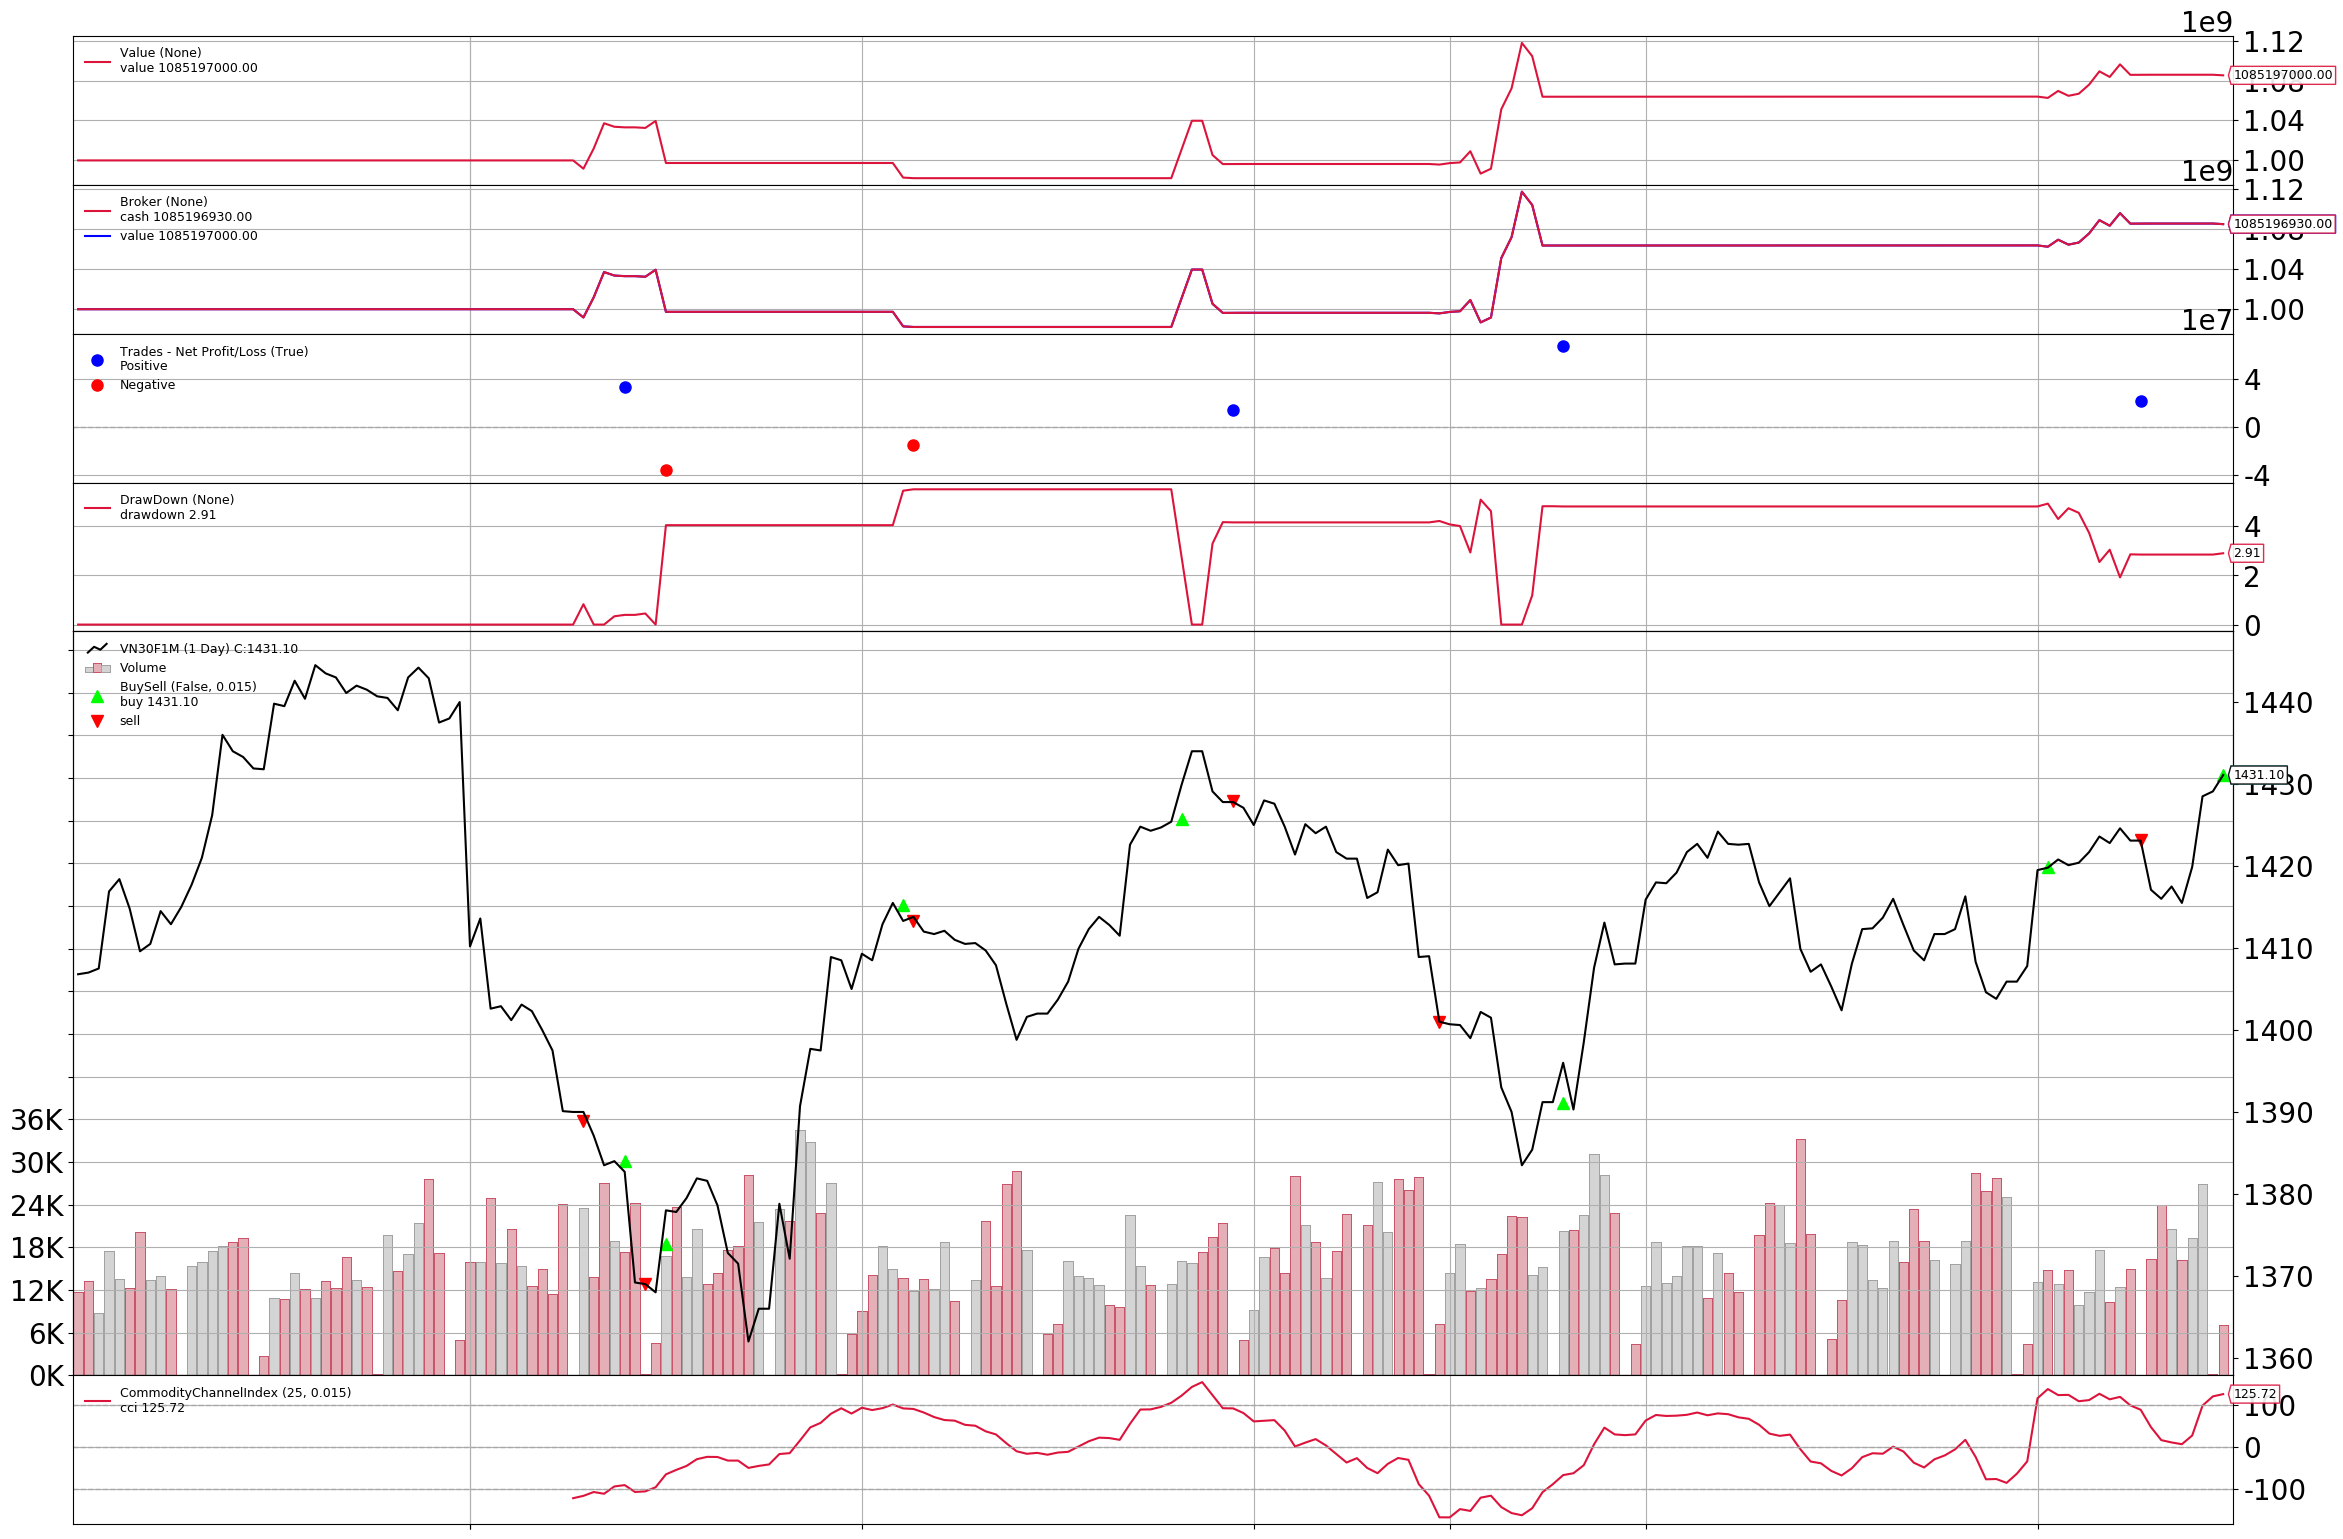

In [6]:
# Run without output
res = simulation.run(output=None, iplot = False)